In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Load the cleaned dataset
df = pd.read_csv('extracted_data_with_llm_v2.csv')

# Basic Cleaning: Keep only relevant columns for modeling
model_df = df[['Extracted Income', 'Extracted Credit Score', 'Extracted Approval Amount']].copy()


In [6]:
# Convert to numeric and handle missing values
model_df['Extracted Income'] = pd.to_numeric(model_df['Extracted Income'], errors='coerce')
model_df['Extracted Credit Score'] = pd.to_numeric(model_df['Extracted Credit Score'], errors='coerce')
model_df['Extracted Approval Amount'] = pd.to_numeric(model_df['Extracted Approval Amount'], errors='coerce')

# Drop rows with no usable fields
model_df.dropna(how='all', inplace=True)


In [7]:
# Summary of available data
model_df.describe()


,Extracted Income,Extracted Credit Score,Extracted Approval Amount
count,13.000000,27.000000,1.0
mean,79769.230769,739.148148,16900.0
std,49427.394304,38.803949,NaN
min,20000.000000,660.000000,16900.0
25%,50000.000000,712.000000,16900.0
50%,70500.000000,747.000000,16900.0
75%,112000.000000,762.000000,16900.0
max,200000.000000,823.000000,16900.0


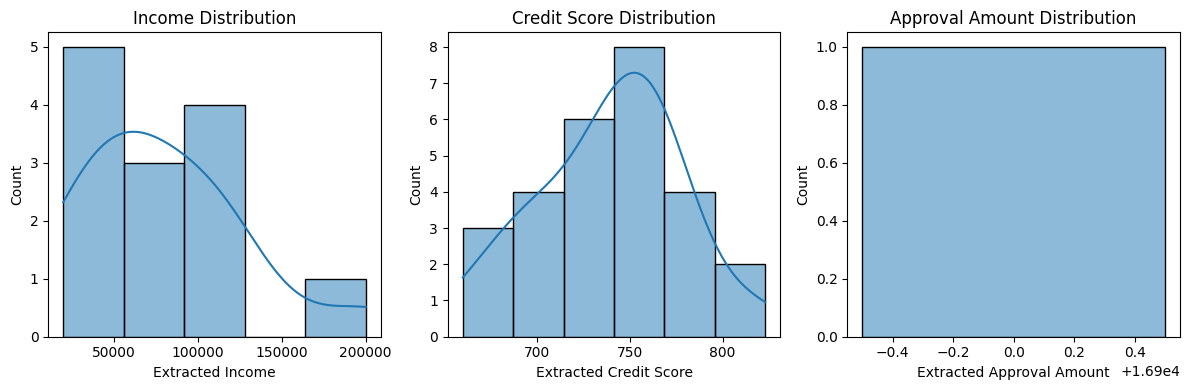

In [8]:
# Visualizations
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.histplot(model_df['Extracted Income'].dropna(), kde=True)
plt.title('Income Distribution')

plt.subplot(1, 3, 2)
sns.histplot(model_df['Extracted Credit Score'].dropna(), kde=True)
plt.title('Credit Score Distribution')

plt.subplot(1, 3, 3)
sns.histplot(model_df['Extracted Approval Amount'].dropna(), kde=True)
plt.title('Approval Amount Distribution')

plt.tight_layout()
plt.show()


In [9]:
# Save cleaned dataset for modeling
model_df.to_csv('model_ready_data.csv', index=False)
print("Saved cleaned dataset to model_ready_data.csv")


Saved cleaned dataset to model_ready_data.csv


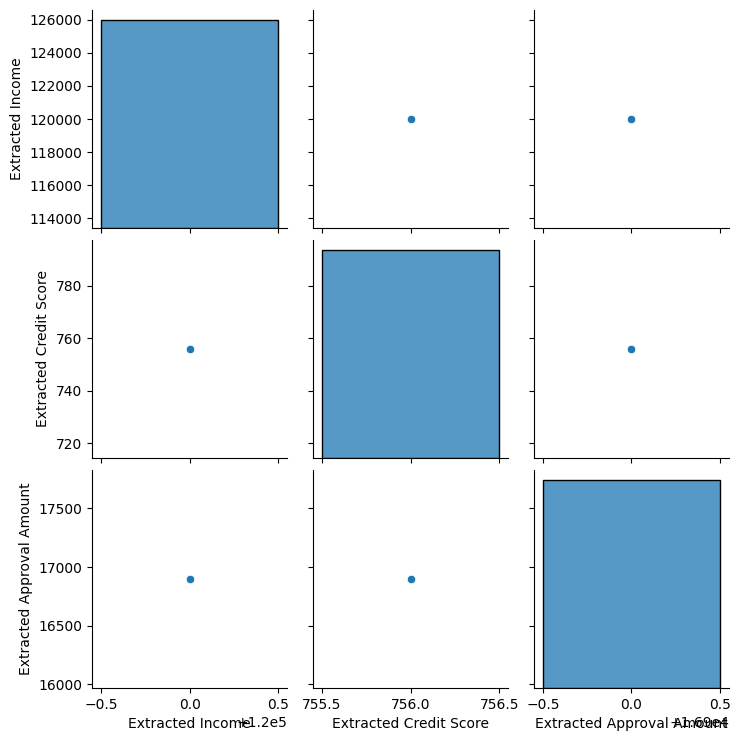

                           Extracted Income  Extracted Credit Score  \
Extracted Income                    1.00000                 0.49771   
Extracted Credit Score              0.49771                 1.00000   
Extracted Approval Amount               NaN                     NaN   

                           Extracted Approval Amount  
Extracted Income                                 NaN  
Extracted Credit Score                           NaN  
Extracted Approval Amount                        NaN  


In [10]:
sns.pairplot(model_df.dropna())
plt.show()

print(model_df.corr())


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

model_df_clean = model_df.dropna()

X = model_df_clean[['Extracted Income', 'Extracted Credit Score']]
y = model_df_clean['Extracted Approval Amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print(f"R^2 Score on Test Set: {model.score(X_test, y_test):.2f}")


ValueError: With n_samples=1, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.